In [25]:
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [35]:
y = np.array(pd.read_csv("clean_data/ETHUSDT_minute.csv").Close)

In [38]:
def visualize_series(y, sr):
    S = np.abs(librosa.stft(y))
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    fig, ax = plt.subplots(nrows=2, sharex=True)
    img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                                   y_axis='log', x_axis='time', ax=ax[0])
    fig.colorbar(img, ax=[ax[0]])
    ax[0].label_outer()
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
    fig.colorbar(img, ax=[ax[1]])
    plt.show()

500


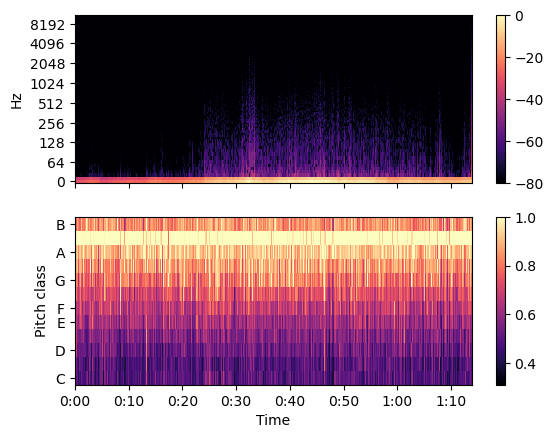

1000


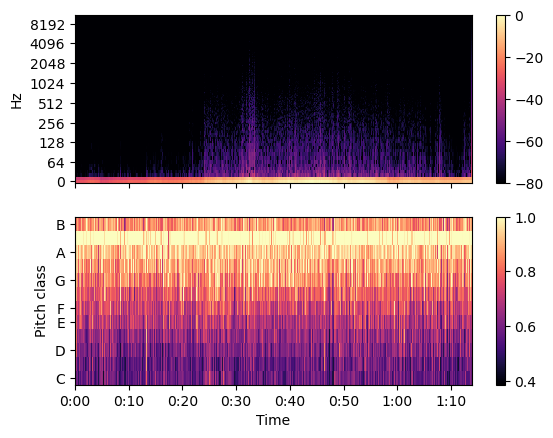

1500


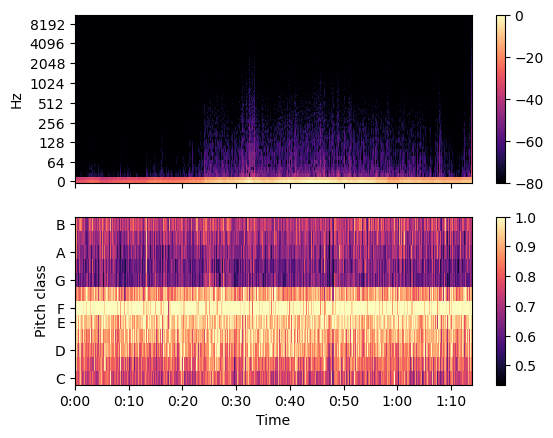

2000


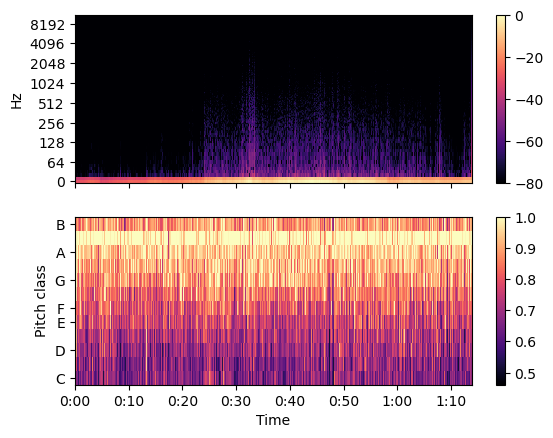

2500


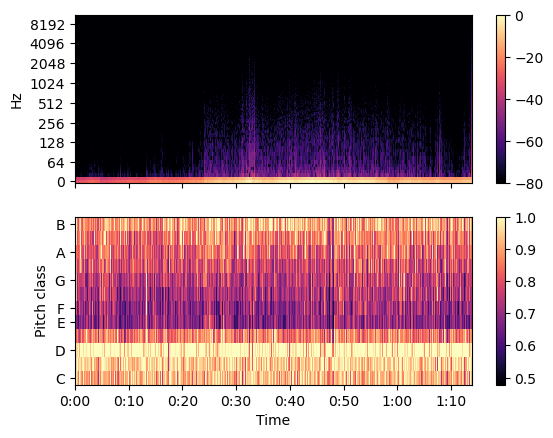

3000


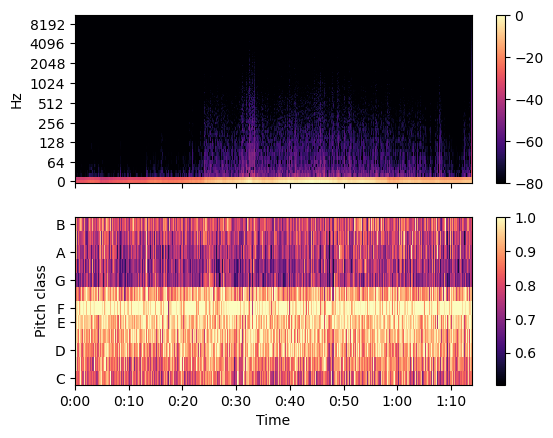

3500


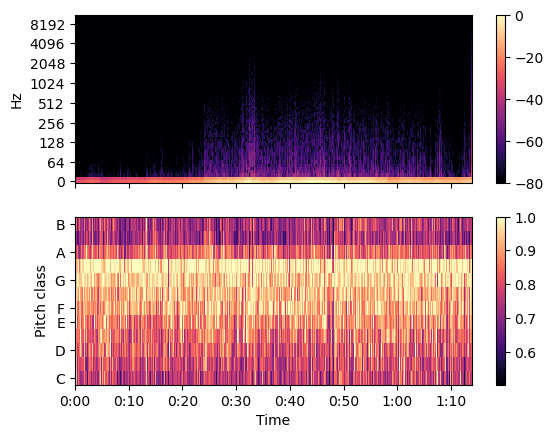

4000


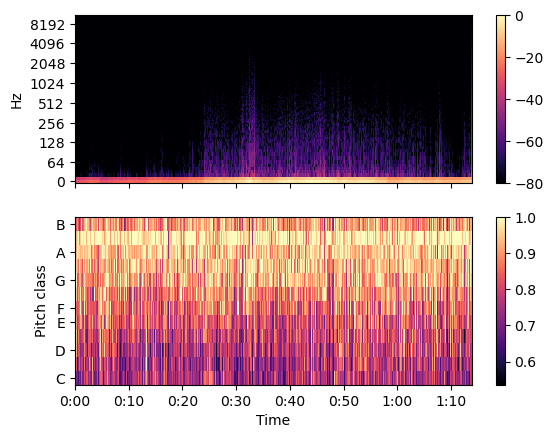

4500


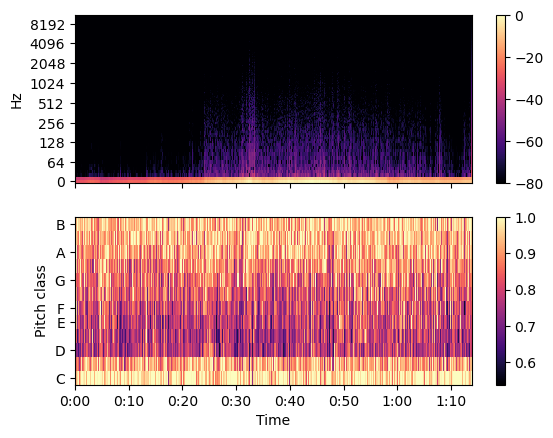

5000


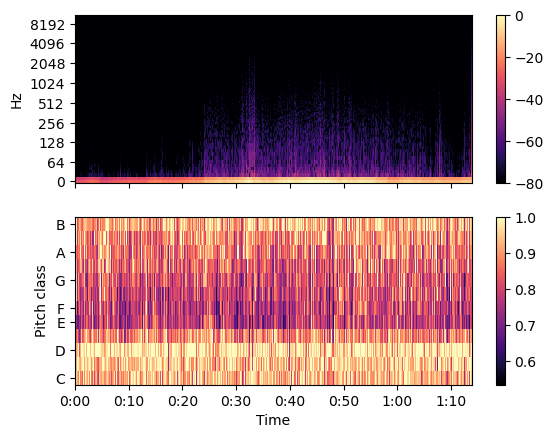

5500


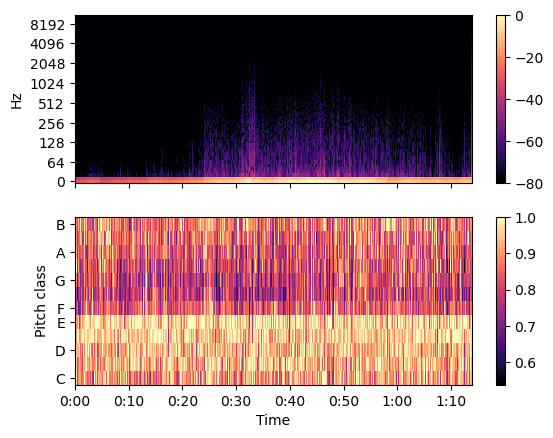

6000


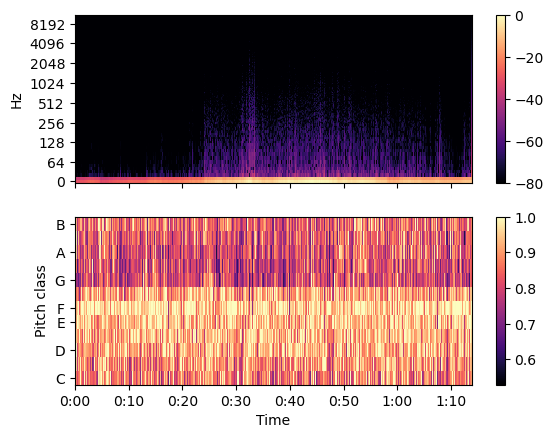

6500


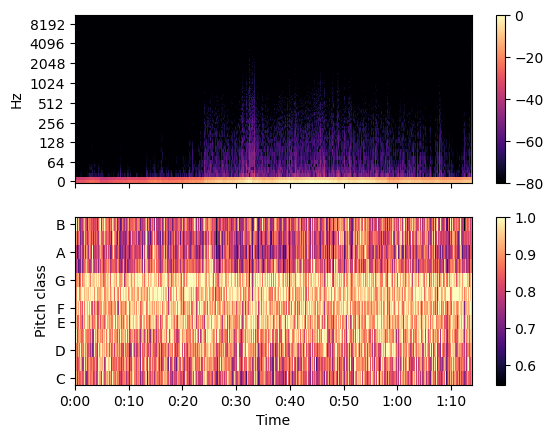

7000


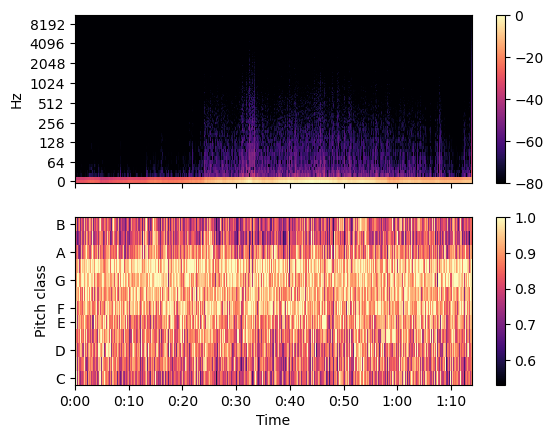

7500


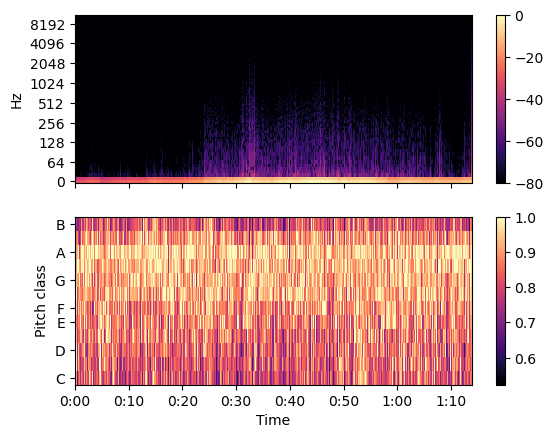

8000


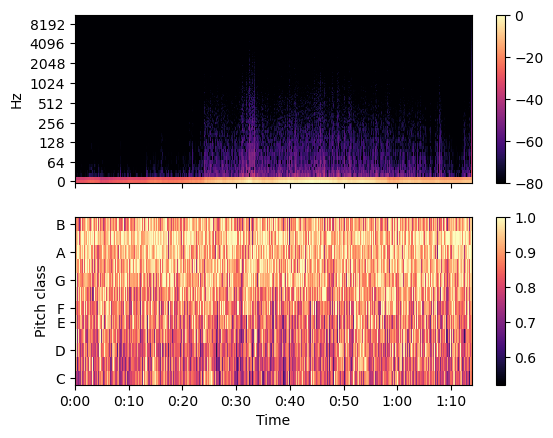

8500


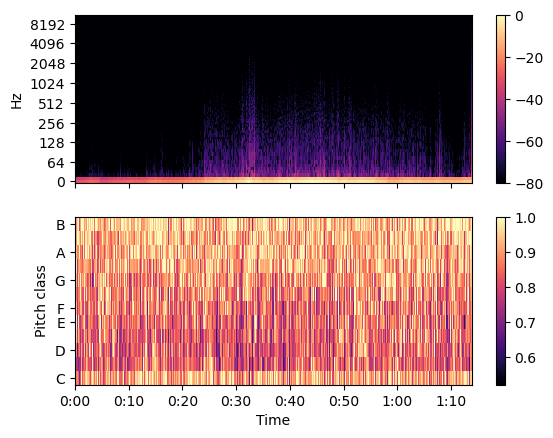

9000


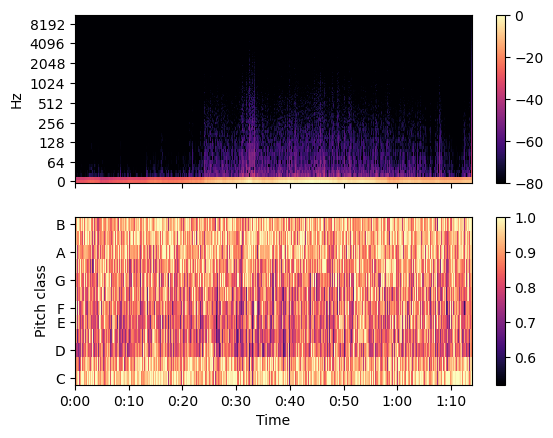

9500


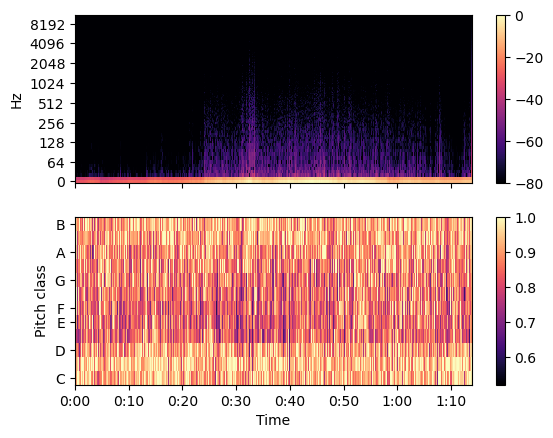

In [42]:
for i in range(500, 10000, 500):
    print(i)
    visualize_series(y, i)

## I choose 4000

In [51]:
d = pd.read_csv("clean_data/ETHUSDT_minute.csv", parse_dates = ['Date'])

Open


/Users/mgaulia/miniforge3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)


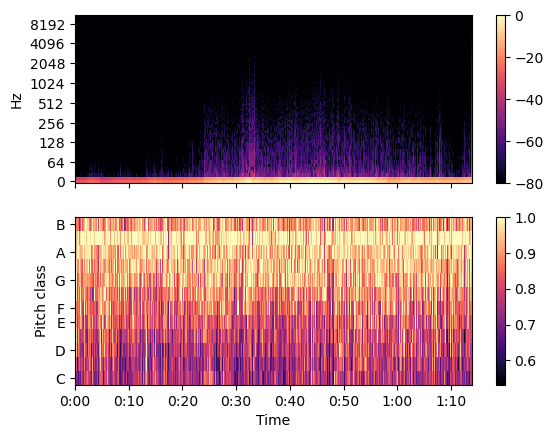

High


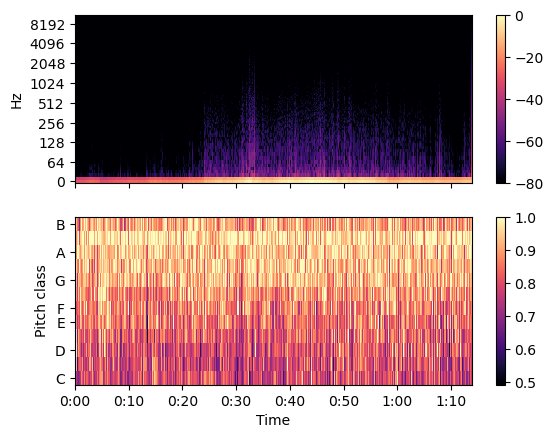

Low


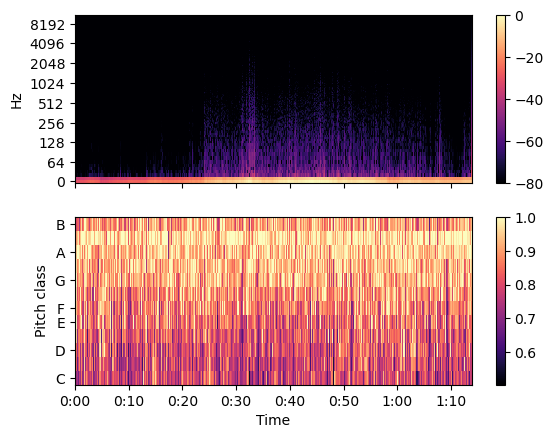

Close


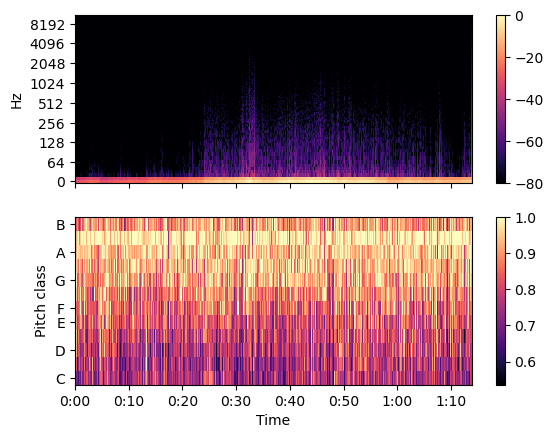

Volume


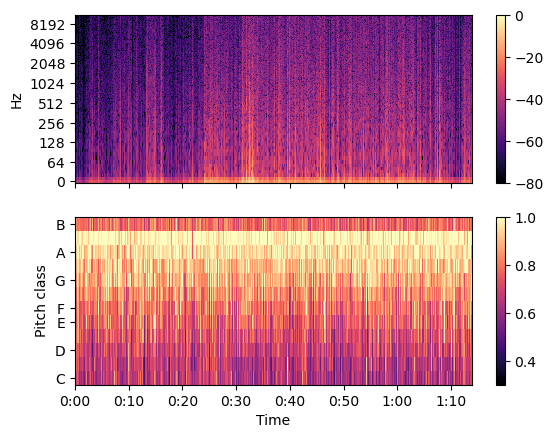

In [48]:
for c in d.columns[1:]:
    print(c)
    visualize_series(np.array(d[c]), 4000)

In [55]:
d["day"] = d.Date.dt.date

In [56]:
d

,Date,Open,High,Low,Close,Volume,day
0,2020-01-01 00:01:00,128.95,129.04,128.93,128.94,89717.064890,2020-01-01
1,2020-01-01 00:02:00,128.93,128.97,128.92,128.92,17008.706740,2020-01-01
2,2020-01-01 00:03:00,128.97,128.98,128.93,128.96,58748.975470,2020-01-01
3,2020-01-01 00:04:00,128.95,128.95,128.76,128.81,111594.840230,2020-01-01
4,2020-01-01 00:05:00,128.78,128.81,128.71,128.75,34181.492130,2020-01-01
...,...,...,...,...,...,...,...
1627545,2023-02-07 23:55:00,1672.59,1672.79,1672.41,1672.79,435202.007718,2023-02-07
1627546,2023-02-07 23:56:00,1672.78,1672.79,1672.29,1672.29,530388.537990,2023-02-07
1627547,2023-02-07 23:57:00,1672.29,1672.30,1671.53,1671.56,386389.967622,2023-02-07
1627548,2023-02-07 23:58:00,1671.57,1671.57,1671.18,1671.28,184160.069444,2023-02-07


2020-01-01


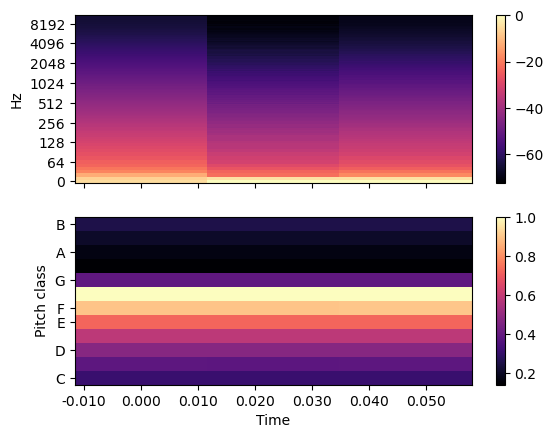

2020-01-02


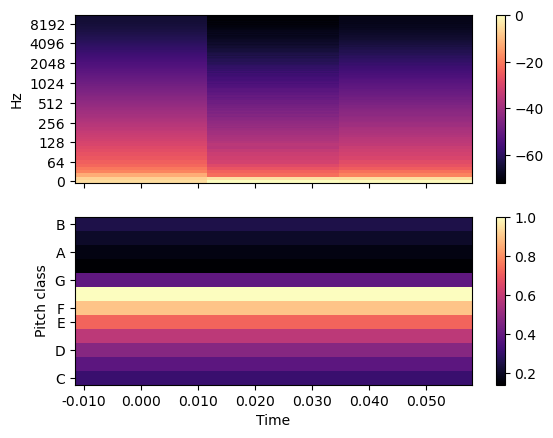

2020-01-03


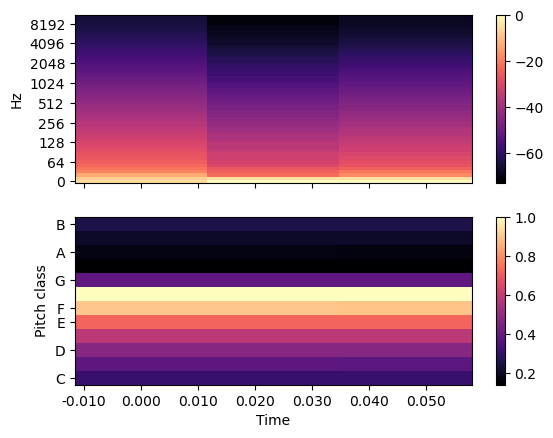

In [69]:
for i in d.day.unique()[:3]:
    print(i)
    y = np.array(d[d.day == i].Close)
    visualize_series(y, 6)
